In [1]:
from methods.config import *
from methods.model_results import best_models
from methods.plot import plot_fund_forecast, plot_example_results
from methods.fund_forecast import forecast_fund_value
from methods.analyse_hypertune import (
    hypertune_best_results,
    aggregate_hypertune_results,
    hypertune_best_fixed_params,
    hypertune_best_variable_params,
)

# Forecasting Results

In [2]:
best_results, best_results_detailed = hypertune_best_results(best_models)
best_results

During COVID                                                              \
       CPIAUCSL                 GS5              UNRATE                 RPI   
            Val      Test       Val      Test       Val      Test       Val   
1      0.889663  1.129157  0.746644  0.907147  0.341540  0.939642  0.534224   
3      0.900178  0.990923  0.720062  0.780095  0.016061  0.753072  0.804314   
6      0.940525  0.989977  0.766554  0.819814  0.363070  0.928883  0.962762   
12     0.977304  1.011568  0.955689  0.991405  0.848854  0.998315  0.997338   
24     0.995592  1.005320  0.979557  0.996269  0.633458  0.994321  1.004737   

             After GFC            ... During GFC           Before GFC  \
              CPIAUCSL            ...        RPI             CPIAUCSL   
        Test       Val      Test  ...        Val      Test        Val   
1   0.884116  0.878240  0.909009  ...   0.680522  0.957802   0.844090   
3   0.941113  0.971813  0.981608  ...   0.823578  0.989266   0.893876   
6   0.972845  0.934918  0.999913  ...   0.854366  0.997768   0.906650   
12  0.961955  0.960151  0.993910  ...   0.880061  0.964955   0.932619   
24  0.999159  0.995615  1.006927  ...   0.928600  0.999824   0.979087   

                                                                          
                   GS5              UNRATE                 RPI            
        Test       Val      Test       Val      Test       Val      Test  
1   0.980482  0.165474  0.902426  0.552936  0.396579  0.872620  0.904465  
3   0.920966  0.758268  0.871939  0.533171  0.405813  0.742081  0.842177  
6   0.895300  0.614142  0.768125  0.415333  0.517530  0.999570  0.858755  
12  0.943620  0.588950  0.852131  0.538241  0.560385  0.891184  0.833729  
24  1.000527  0.890218  0.882123  0.499406  0.658973  0.977801  0.838660  

[5 rows x 32 columns]

In [4]:
aggregate_results = aggregate_hypertune_results(best_results)
aggregate_results

CPIAUCSL                 GS5              UNRATE                 RPI  \
         Val      Test       Val      Test       Val      Test       Val   
1   0.984347  0.898869  0.591895  0.838774  0.482111  0.632876  0.763114   
3   0.955584  0.935117  0.660581  0.778126  0.430465  0.730321  0.833069   
6   0.945117  0.950333  0.727928  0.784762  0.515853  0.785184  0.948412   
12  0.947001  0.998069  0.707400  0.858017  0.676862  0.832507  0.940998   
24  0.990184  0.999717  0.817665  0.887258  0.548287  0.802140  0.976874   

              
        Test  
1   0.880210  
3   0.831589  
6   0.902717  
12  0.891806  
24  0.951256

# Best Hyperparameters

In [5]:
number_of_pca = hypertune_best_fixed_params(
    best_models, "number_of_pca", "Number of PCA"
)

In [ ]:
look_back_years = hypertune_best_fixed_params(
    best_models, "look_back_years", "Look Back Years"
)

In [ ]:
CNN_layers = hypertune_best_variable_params(best_models, "CNN_layers", "CNN Layers")

In [ ]:
CNN_filters = hypertune_best_variable_params(
    best_models, "CNN_0_filters", "CNN Filters", ignore_0=True
)

In [ ]:
LSTM_layers = hypertune_best_variable_params(best_models, "LSTM_layers", "LSTM Layers")

In [ ]:
LSTM_units = hypertune_best_variable_params(
    best_models, "LSTM_0_units", "LSTM Neurons", ignore_0=True
)

In [ ]:
Dense_layers = hypertune_best_variable_params(
    best_models, "Dense_layers", "Dense Layers"
)

In [ ]:
Dense_units = hypertune_best_variable_params(
    best_models, "Dense_0_units", "Dense Neurons", ignore_0=True
)

# Prediction Intervals

In [ ]:
plot_example_results(
    best_results_detailed, "During COVID", alphas=[0.4, 0.1], model="NN"
)

In [ ]:
plot_example_results(best_results_detailed, "After GFC", alphas=[0.4, 0.1], model="NN")

In [ ]:
plot_example_results(best_results_detailed, "During GFC", alphas=[0.4, 0.1], model="NN")

In [ ]:
plot_example_results(best_results_detailed, "Before GFC", alphas=[0.4, 0.1], model="NN")

In [ ]:
plot_example_results(
    best_results_detailed, "During COVID", alphas=[0.4, 0.1], model="Var"
)

In [ ]:
plot_example_results(best_results_detailed, "After GFC", alphas=[0.4, 0.1], model="Var")

In [ ]:
plot_example_results(
    best_results_detailed, "During GFC", alphas=[0.4, 0.1], model="Var"
)

In [ ]:
plot_example_results(
    best_results_detailed, "Before GFC", alphas=[0.4, 0.1], model="Var"
)

# Fund Forecast

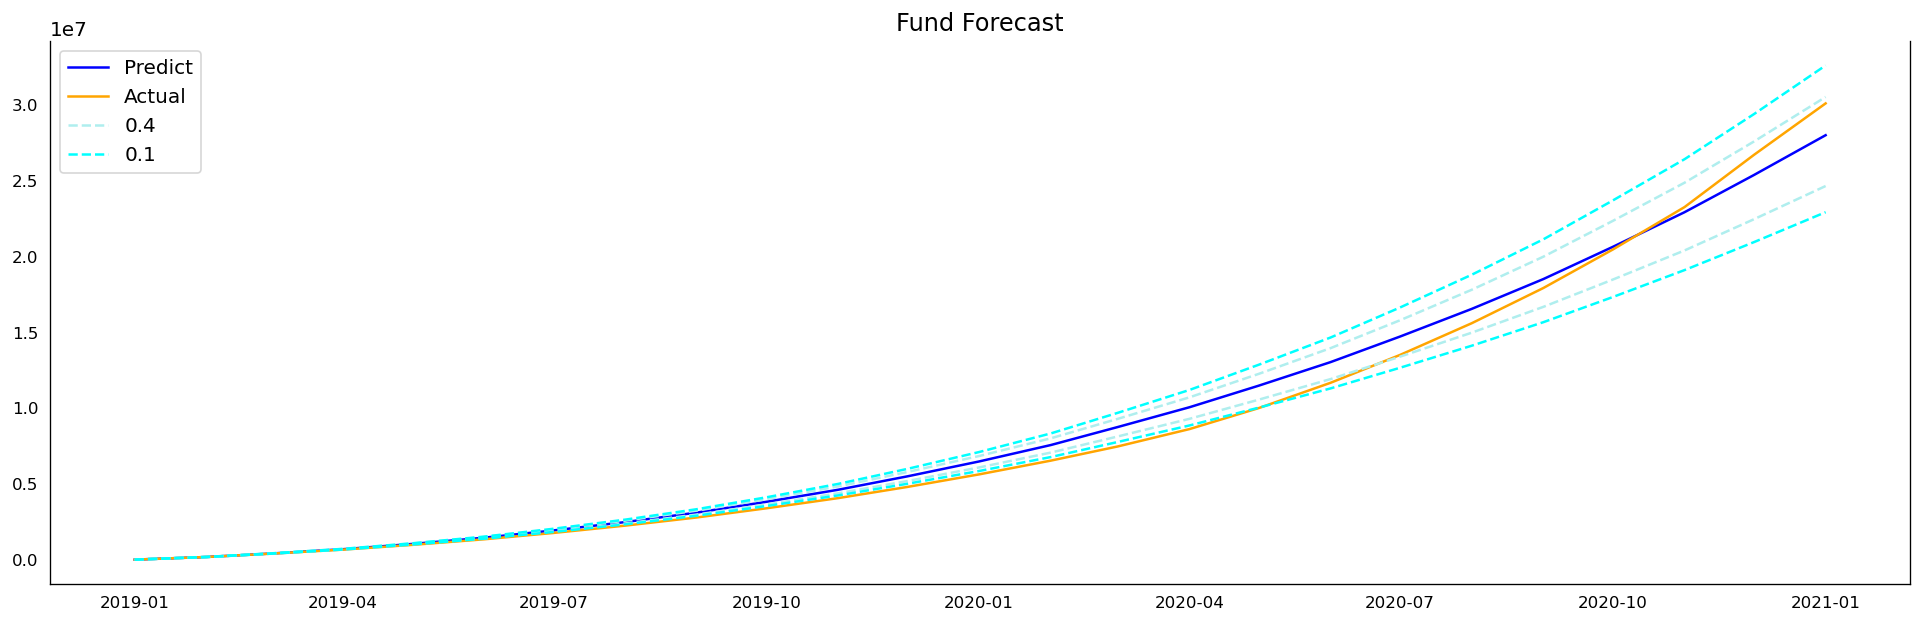

In [3]:
x = forecast_fund_value(best_results_detailed, period="During COVID", interval=True)
plot_fund_forecast(x, "During COVID")

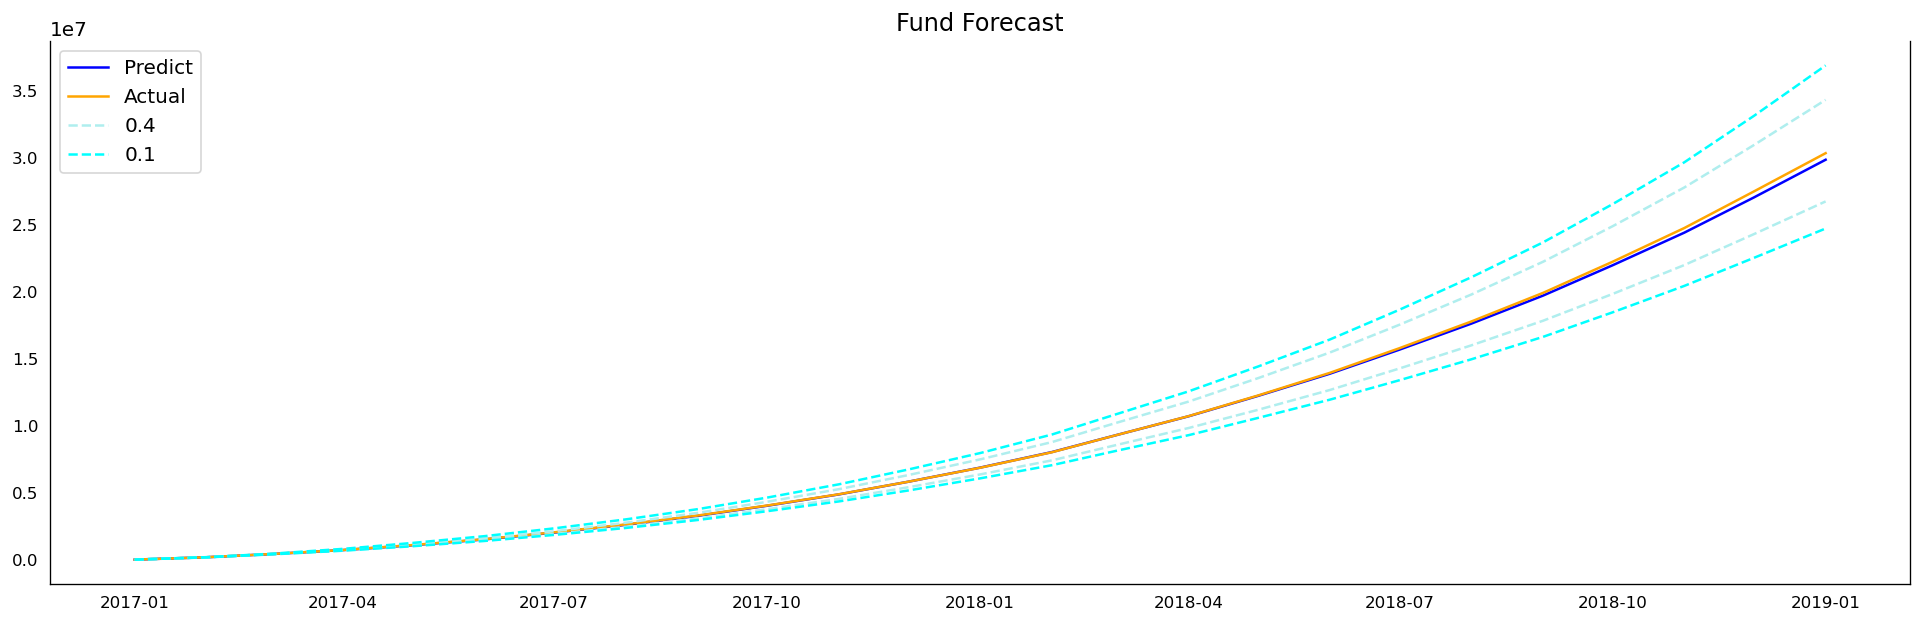

In [4]:
x = forecast_fund_value(best_results_detailed, period="After GFC", interval=True)
plot_fund_forecast(x, "After GFC")

In [ ]:
x = forecast_fund_value(best_results_detailed, period="During GFC", interval=True)
plot_fund_forecast(x, "During GFC")

In [ ]:
x = forecast_fund_value(best_results_detailed, period="Before GFC", interval=True)
plot_fund_forecast(x, "Before GFC")